In [26]:
import os
import math
import dill
from itertools import permutations
import pandas as pd
from statsmodels.regression.mixed_linear_model import MixedLM

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ko_mice = [m for m in ko_mice if m not in ['Cre8']]
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
figdir = "/mnt/BigDisk/YMazeResults/behavior/"
os.makedirs(figdir,exist_ok=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}
0.10702809471379604
0.10865030627374707
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}
0.11907176734311653
0.0980084938178404
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.07039782413863281
0.06678926464356186
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
0.09186082440085229
0.08603898274105169
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.034124481854165584
0.03728254340716014
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}
0.06535343968604512
0.054049832033087025
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 0}
0.05830066885065254

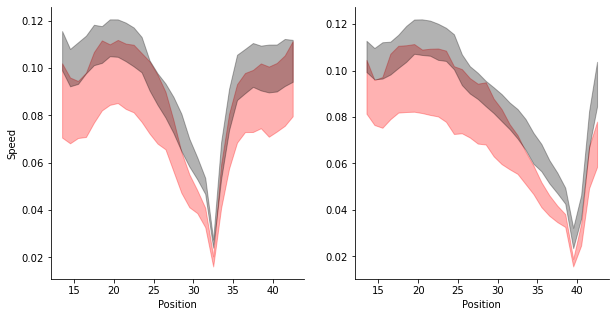

In [47]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
#         mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:], axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
#         mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:], axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
# ax[1].fill_betweenx([0,2], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
# ax[0].fill_betweenx([0,2],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'LR_norm_speed_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
0.11243933879461913
0.12867779235850732
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}
0.12706889062694726
0.12529288662225152
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
0.06869997204288011
0.067993418044285
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
0.12270351986711003
0.10635540354613626
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
0.07128422753362292
0.06558281996407248
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
0.053164238296455064
0.05397552098342527
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.05733085543584012
0.

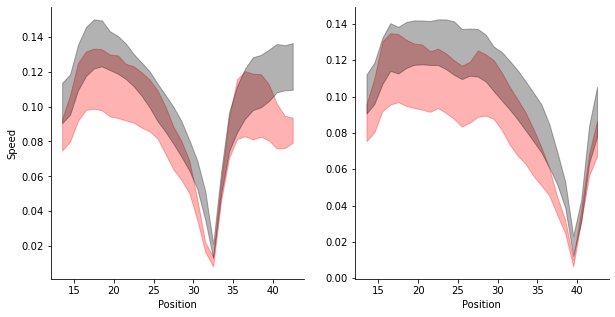

In [48]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
#         mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:], axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
#         mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:], axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
# ax[1].fill_betweenx([0,2], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
# ax[0].fill_betweenx([0,2],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'LR_norm_speed_day6.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
0.11243933879461913
0.12867779235850732
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}
0.12706889062694726
0.12529288662225152
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
0.06869997204288011
0.067993418044285
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
0.12270351986711003
0.10635540354613626
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
0.07128422753362292
0.06558281996407248
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
0.053164238296455064
0.05397552098342527
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.05733085543584012
0.

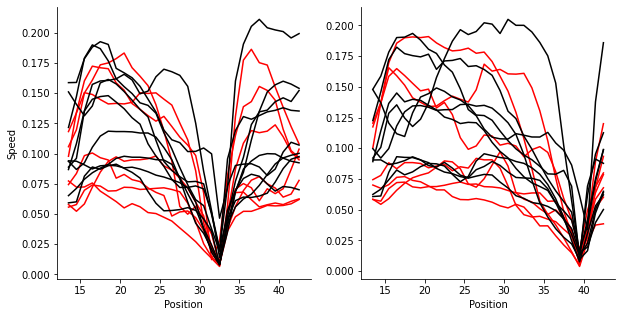

In [67]:
fig,ax = plt.subplots(1,2, figsize = [10,5])


for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'], np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), color = 'red')




for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'], np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0), color = 'black')

    

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', '

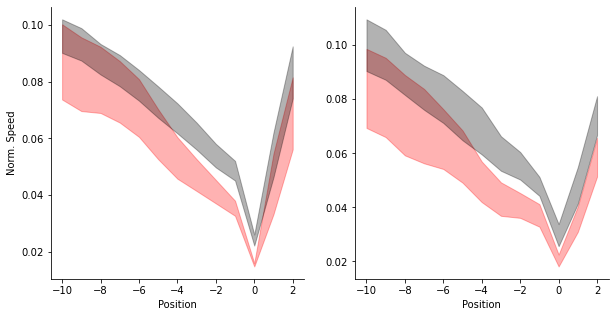

In [8]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        
        
        
#         mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
#         mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
# ax[0].fill_betweenx([0,2], 0, 2, zorder=0, color='purple',alpha=.3)
# ax[1].fill_betweenx([0,2],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'famnov_norm_speed_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 's

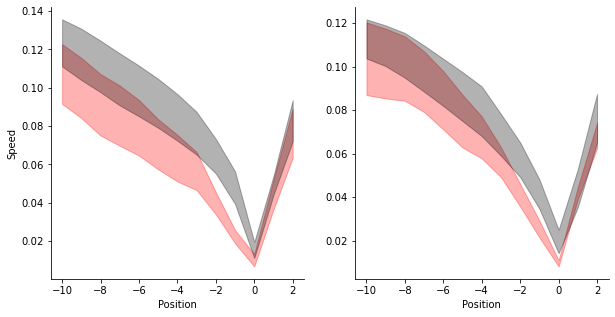

In [49]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
#         mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
#         mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
# ax[0].fill_betweenx([0,2], 0, 2, zorder=0, color='purple',alpha=.3)
# ax[1].fill_betweenx([0,2],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'famnov_norm_speed_day6.pdf'))

In [11]:
# reversal lick rates
def reversal_speedmat(mice, date_inds = [6,]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_vr_sessions(mouse, date_inds = [6,])
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==6)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = ((concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==6) + (concat_sess.trial_info['sess_num']==7) + \
              (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2))>0

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['speed'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['speed'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['speed'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['speed'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [12]:
ko_l_speedmat, ko_r_speedmat = reversal_speedmat(ko_mice)
ctrl_l_speedmat, ctrl_r_speedmat = reversal_speedmat(ctrl_mice)

['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
44
45
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
47
38
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
26
27
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
38
35
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
20
17
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
38
45
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
26
28
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
57
43
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
48
52
['LR', 'block_number',

-0.7789845364481452 0.4489564791611337
0.6195198516498629 0.5455249317960247
nan nan
nan nan
nan nan
nan nan


<ipython-input-13-208b2c6d05d6>:11: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0)
<ipython-input-13-208b2c6d05d6>:21: RuntimeWarning: Mean of empty slice
  _ko = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
<ipython-input-13-208b2c6d05d6>:34: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(np.nanmean(ko_r_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_speedmat[:,start:start+10,:], axis=1),axis=0)
<ipython-input-13-208b2c6d05d6>:11: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0)
<ipython-input-13-208b2c6d05d6>:21: RuntimeWarning: Mean of empty slice
  _ko = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axi

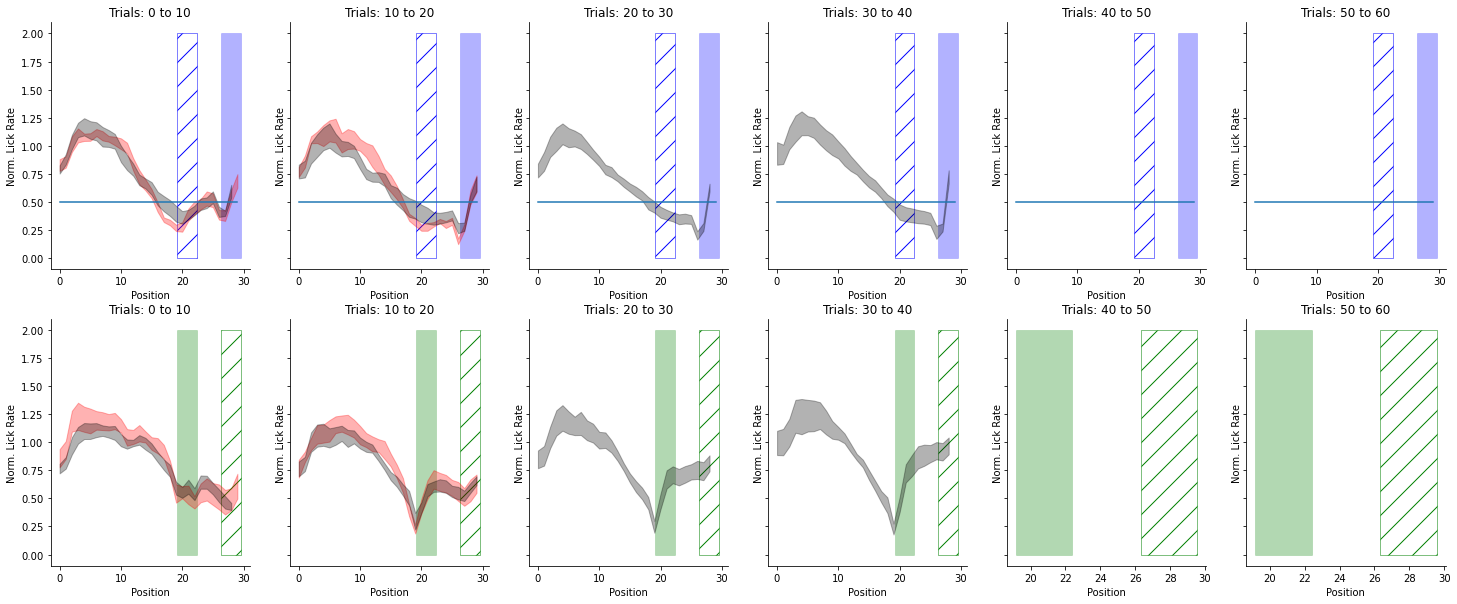

In [13]:
fig,ax = plt.subplots(2,6, figsize= [25,10], sharey=True)
for i,start in enumerate(range(0,60,10)):
    
    ax[0,i].fill_betweenx([0,2], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,2], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_speedmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_speedmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    ax[0,i].plot(np.arange(30), .5*np.ones([30,]))
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_speedmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,2], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,2], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_speedmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_speedmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_speedmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
# fig.savefig(os.path.join(figdir, 'reversal_speed.pdf'))

In [57]:
def get_early_speed(sess):
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['tfront']-5)*(t_early_bins<=sess.rzone_early['tfront']-1)
    baseline_mask = (sess.trial_info['sess_num']==6)*(sess.trial_info['LR']==-1)*(sess.trial_info['block_number']<2)
    ret_mask = (sess.trial_info['sess_num']==8)*(sess.trial_info['block_number']>1)
    rev_mask = (~baseline_mask)*(sess.trial_info['LR']==-1)*(~ret_mask)
    
    lr_early = sess.trial_matrices['speed'][:, rzone_early].mean(axis=1)
    lr_b = lr_early[baseline_mask].mean()
    lr_rev = lr_early[rev_mask]
    return lr_rev #/lr_b
    

def get_early_speed_slope(sess):
    lr_rev = get_early_speed(sess)
    max_trial = np.minimum(lr_rev.shape[0],40)
    x = np.arange(max_trial)
    res = sp.stats.linregress(x[5:],lr_rev[5:max_trial])
    return res.slope



In [58]:
ko_lr_rev = [get_early_speed(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ko_mice]
ctrl_lr_rev = [get_early_speed(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ctrl_mice]

['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

58


<ipython-input-62-c578de185852>:42: RuntimeWarning: Mean of empty slice
  mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')


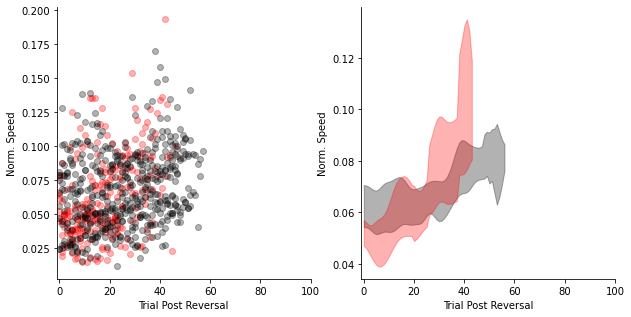

In [62]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

max_x = 0

for lr in ko_lr_rev:    
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='red', alpha=.3)
    
for lr in ctrl_lr_rev:
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='black',alpha=.3)

print(max_x)
ko_lr_arr = np.zeros([len(ko_lr_rev), max_x])*np.nan
ctrl_lr_arr = np.zeros([len(ctrl_lr_rev), max_x])*np.nan
for i, lr in enumerate(ko_lr_rev):
    n = lr.shape[0]
    ko_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
for i, lr in enumerate(ctrl_lr_rev):
    n = lr.shape[0]
    ctrl_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
# trials = np.arange(0,80)
# y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
# ax[0].plot(trials, y, color = 'black',linewidth=5)
# trials = np.arange(0,40)
# y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
# ax[0].plot(trials,y, color='red',linewidth=5)





    
x = np.arange(0, max_x)
mu,sem = np.nanmean(ctrl_lr_arr,axis=0), sp.stats.sem(ctrl_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='black', alpha= .3)

mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='red', alpha= .3)

for r in range(2):
    ax[r].set_xlim([-1,100])
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)
    ax[r].set_xlabel('Trial Post Reversal')
    ax[r].set_ylabel('Norm. Speed')
    
fig.savefig(os.path.join(figdir, 'reversal_early_speed.pdf'))

In [63]:
ko_slopes = np.array([get_early_speed_slope(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ko_mice])
ctrl_slopes = np.array([get_early_speed_slope(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ctrl_mice])

['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

(7,) (9,)
1.1428244281361646 0.27227922672169225
1.00558663564743 0.31461445529998733


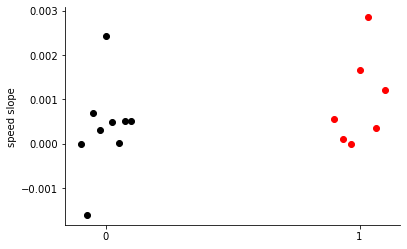

In [64]:
fig, ax = plt.subplots()
print(ko_slopes.shape,ctrl_slopes.shape)
ax.scatter(np.linspace(-.1,.1,num=len(ko_mice))+1, ko_slopes, color='red')
# ax.scatter(np.linspace(-.1,.1,num=3)+1, ko_slopes[5:], color='red')
ax.scatter(np.linspace(-.1,.1,num=len(ctrl_mice)), ctrl_slopes, color='black')
# ax.scatter(np.linspace(-.1,.1,num=4), ctrl_slopes[5:], color='black')
t,p = sp.stats.ttest_ind(ko_slopes, ctrl_slopes)
print(t,p)
t,p = sp.stats.ranksums(ko_slopes, ctrl_slopes)
print(t,p)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('speed slope')
ax.set_xticks([0,1])


In [65]:
df = pd.DataFrame({'ko': [],
                   'trial': [],
                   'trial_frac': [],
                   'mouse': [],
                   'lr': [],
                   'intercept': [],
                   'ko_x_trial': [],
                   'ko_x_trial_frac': [],
                  })

for mouse in ko_mice:
    lr = get_early_speed(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 1,
                        'ko_x_trial': i,
                        'ko_x_trial_frac': trial_frac,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)
        
for mouse in ctrl_mice:
    lr = get_early_speed(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 0,
                        'ko_x_trial': 0,
                        'ko_x_trial_frac': 0,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)

['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

In [66]:
_df = df[(df['trial']>0) & (df['trial']<40)]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial', 'ko_x_trial', 'intercept']], _df['mouse']) #, exog_re=_df['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.params)
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: lr       
No. Observations: 572     Method:             REML     
No. Groups:       16      Scale:              0.0003   
Min. group size:  19      Log-Likelihood:     1492.7595
Max. group size:  39      Converged:          Yes      
Mean group size:  35.8                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
ko           -0.013    0.012 -1.067 0.286 -0.036  0.011
trial         0.000    0.000  3.931 0.000  0.000  0.000
ko_x_trial    0.000    0.000  3.160 0.002  0.000  0.001
intercept     0.059    0.008  7.564 0.000  0.044  0.074
Group Var     0.001    0.012                           

ko           -0.012571
trial         0.000301
ko_x_trial    0.000423
intercept     0.058845
Group Var     1.989549
dtype: float64
ko            0.011784
trial         0

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
